<a href="https://colab.research.google.com/github/sidh26/CV-Classwork/blob/master/class9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilabel Classification

In [ ]:
from fastai.vision import *

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"sidhsatam","key":"5d2a82f91cf79b90f0b970d302cbabef"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [ ]:
! kaggle datasets download -d nikitarom/planets-dataset -p {path}

100% 1.49G/1.50G [00:17<00:00, 93.2MB/s]
100% 1.50G/1.50G [00:17<00:00, 90.0MB/s]


In [ ]:
! unzip -q -n {path}/planets-dataset.zip -d {path}

In [ ]:
df = pd.read_csv(path/'planet/planet/train_classes.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [ ]:
import os
os.listdir(path/'planet/')

['test-jpg-additional', 'planets-dataset.zip', 'planet']

In [ ]:
path

PosixPath('/root/.fastai/data/planet')

In [ ]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'planet/planet/train_classes.csv', folder='planet/planet/train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))
# csv doesnt contain path to images thats why add folder and suffix

In [ ]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))
# imagenet coz pretrained model trained on imagenet

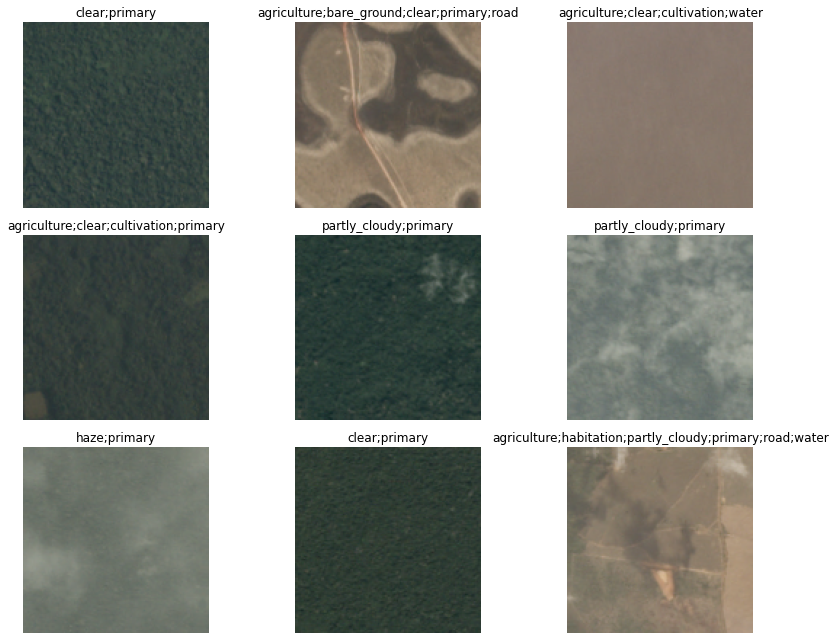

In [ ]:
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
arch = models.resnet50

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.2) # threshold for classification for each class
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score], callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


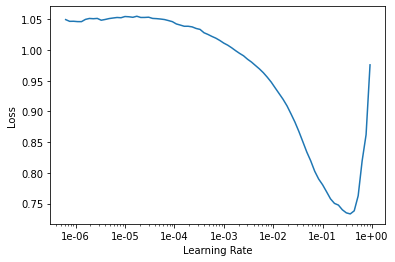

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.131245,0.139652,0.949766,0.875282,02:31
1,0.187527,15.553107,0.677869,0.528013,02:30
2,0.168815,2.316437,0.949090,0.885836,02:30
3,0.144160,0.583351,0.947818,0.883654,02:30
4,0.124512,0.324319,0.946590,0.907996,02:30
5,0.104175,2.886601,0.956117,0.917791,02:30
6,0.097258,3.072803,0.954198,0.920961,02:30


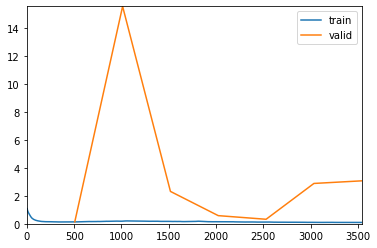

In [ ]:
learn.fit_one_cycle(7, max_lr=slice(1e-2,1e-1))

In [ ]:
learn.save('stage-1-rn50')

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


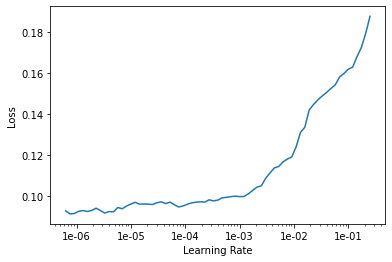

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.093862,3.571213,0.954678,0.921434,02:37
1,0.096513,5.770929,0.953719,0.920054,02:39
2,0.094420,3.126737,0.953711,0.920473,02:37
3,0.093775,2.933926,0.953566,0.920643,02:37
4,0.093905,6.320090,0.952592,0.919138,02:34


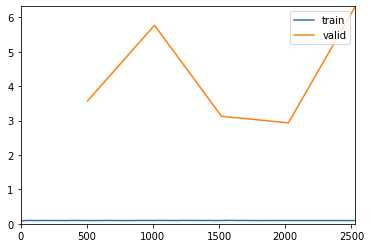

In [ ]:
learn.fit_one_cycle(5, slice(1e-5))